# Basic Pandas

In [4]:
import pandas as pd
a=pd.Series([1,2,3,4])
print(a)

0    1
1    2
2    3
3    4
dtype: int64


In [5]:
a=pd.Series([1,2,3,4],index=["zero","one","two","three"])

In [6]:
print(a)

zero     1
one      2
two      3
three    4
dtype: int64


In [4]:
print(a[2])

3


In [7]:
print(a.values)

[1 2 3 4]


In [8]:
print(a.index)

Index(['zero', 'one', 'two', 'three'], dtype='object')


In [9]:
a.dtype

dtype('int64')

In [10]:
print(a*2)

zero     2
one      4
two      6
three    8
dtype: int64


In [11]:
print(a/2)

zero     0.5
one      1.0
two      1.5
three    2.0
dtype: float64


In [12]:
print(a[["zero","one","two"]])

zero    1
one     2
two     3
dtype: int64


In [13]:
b=["one","two","three","four"]
c=pd.Series(a,index=b)
print(c)

one      2.0
two      3.0
three    4.0
four     NaN
dtype: float64


In [14]:
print(c.isnull())

one      False
two      False
three    False
four      True
dtype: bool


In [15]:
print(c.notnull())

one       True
two       True
three     True
four     False
dtype: bool


In [16]:
print(c+a)

four     NaN
one      4.0
three    8.0
two      6.0
zero     NaN
dtype: float64


# Data Frame

In [17]:
df=pd.DataFrame({"height":[4.5,6.5,5.3,6.1,4.7,5.8],"Weight":[50,75,63,70,55,62]})

In [18]:
df.head()

,height,Weight
0,4.5,50
1,6.5,75
2,5.3,63
3,6.1,70
4,4.7,55


In [19]:
df.sort_values(by="Weight")

,height,Weight
0,4.5,50
4,4.7,55
5,5.8,62
2,5.3,63
3,6.1,70
1,6.5,75


In [20]:
df[df["height"]>=4.7]

,height,Weight
1,6.5,75
2,5.3,63
3,6.1,70
4,4.7,55
5,5.8,62


In [19]:
df[df["Weight"]>=60]

,height,Weight
1,6.5,75
2,5.3,63
3,6.1,70
5,5.8,62


In [21]:
df=df.rename(columns={"height":"Height","Weight":"weight"})

In [22]:
df.head()

,Height,weight
0,4.5,50
1,6.5,75
2,5.3,63
3,6.1,70
4,4.7,55


In [23]:
df.shape

(6, 2)

In [24]:
df.dtypes

Height    float64
weight      int64
dtype: object

In [25]:
df.keys()

Index(['Height', 'weight'], dtype='object')

In [26]:
df.values

array([[ 4.5, 50. ],
       [ 6.5, 75. ],
       [ 5.3, 63. ],
       [ 6.1, 70. ],
       [ 4.7, 55. ],
       [ 5.8, 62. ]])

In [26]:
df.nunique()

Height    6
weight    6
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
Height    6 non-null float64
weight    6 non-null int64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


In [28]:
df.isnull().sum()

Height    0
weight    0
dtype: int64

In [29]:
df.select_dtypes(exclude="float64")

,weight
0,50
1,75
2,63
3,70
4,55
5,62


In [30]:
df.select_dtypes(include="int64")

,weight
0,50
1,75
2,63
3,70
4,55
5,62


In [31]:
df.get_dtype_counts()

float64    1
int64      1
dtype: int64

# Statistics

In [27]:
x=pd.read_csv("C:\\Users\\KATA\\Documents\\DATA SCIENCE\\DataSets 1\\titanic.csv")

In [28]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
x["Age"].mean()

29.69911764705882

In [30]:
x["Age"].std()

14.526497332334044

In [32]:
# Age less than 30
from scipy.stats import norm
norm.cdf(30,x["Age"].mean(),x["Age"].std())

0.5082625637177163

In [35]:
# Age between 40 -60
norm.cdf(60,x["Age"].mean(),x["Age"].std())-norm.cdf(40,x["Age"].mean(),x["Age"].std())

0.22063450611484803

In [36]:
# Age  greater than 60
1-norm.cdf(60,x["Age"].mean(),x["Age"].std())

0.01849364915319729

In [42]:
# To find the value for a given quantile 
norm.ppf(0.45,x["Age"].mean(),x["Age"].std())

27.873698427191083

In [43]:
x.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Correlation (Exclusively for continous variables)

In [44]:
x.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# T test

In [38]:
from scipy.stats import ttest_ind

In [39]:
s1=x[x["Pclass"]==2] ["Survived"]
s2=x[x["Pclass"]==1] ["Survived"]
ttest_ind(s1,s2)

Ttest_indResult(statistic=-3.178614052332485, pvalue=0.0015954656668372637)

In [40]:
s3=x[x["Sex"]=="male"] ["Survived"]
s4=x[x["Sex"]=="female"] ["Survived"]
ttest_ind(s3,s4)

Ttest_indResult(statistic=-19.29781655012335, pvalue=1.4060661308802594e-69)

# F test

In [41]:
from scipy.stats import f_oneway

In [49]:
s1=x[x["SibSp"]==0] ["Survived"]
s2=x[x["SibSp"]==1] ["Survived"]
f_oneway(s1,s2)

F_onewayResult(statistic=24.279615046410388, pvalue=1.0092782591205263e-06)

In [50]:
s3=x[x["Survived"]==0] ["Parch"]
s4=x[x["Survived"]==1] ["Parch"]
f_oneway(s3,s4)

F_onewayResult(statistic=5.963463836603544, pvalue=0.0147992453747224)

# Chi Square Test (Exclusively for categorical variables)

In [45]:
from scipy.stats import chi2_contingency

In [46]:
y=pd.crosstab(x["Survived"],x["Sex"],normalize="index")

In [47]:
y

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [54]:
chi2_contingency(y)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

# EDA 

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


# One continous variable

C:\Users\KATA\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\KATA\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

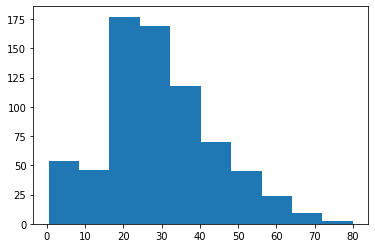

In [300]:
plt.hist(x["Age"])

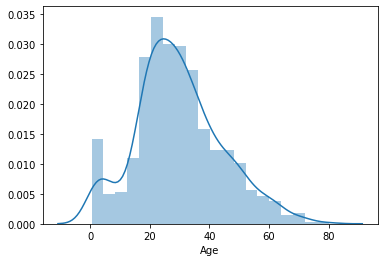

In [301]:
sns.distplot(x["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24884c49668>,
 'caps': [<matplotlib.lines.Line2D at 0x24884c22cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x24884c49f60>],
 'medians': [<matplotlib.lines.Line2D at 0x24884c22eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24884c606a0>],
 'means': []}

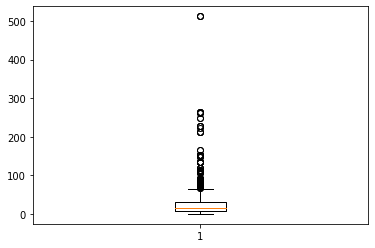

In [302]:
plt.boxplot(x['Fare'])

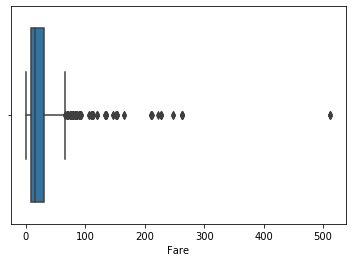

In [303]:
sns.boxplot(x["Fare"])

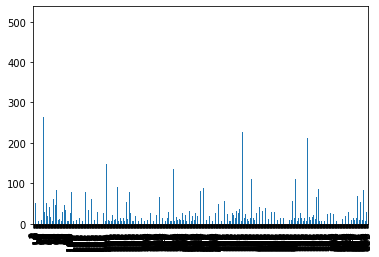

In [304]:
a=pd.Series(x["Fare"]).plot(kind="bar")

# One Discrete Variable

(0, 5)

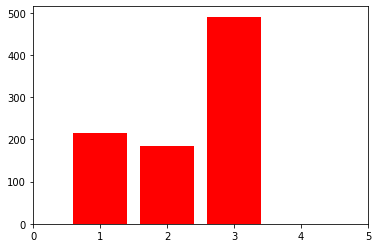

In [305]:
y=x["Pclass"].value_counts()
plt.bar(y.index,y.values,color="red")
plt.xlim(0,5)

<BarContainer object of 7 artists>

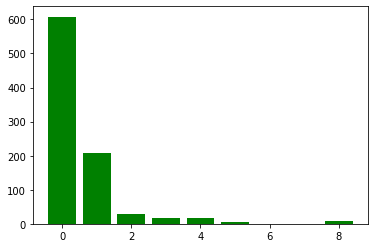

In [306]:
z=x["SibSp"].value_counts()
plt.bar(z.index,z.values,color="green")

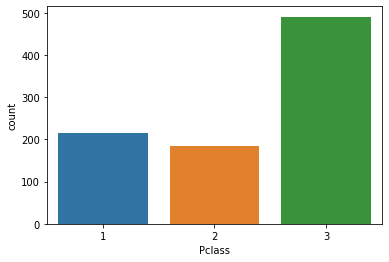

In [307]:
sns.countplot(x["Pclass"])

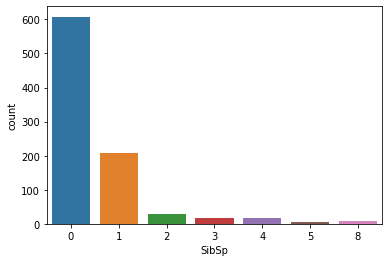

In [308]:
sns.countplot(x["SibSp"])

# Two Continous Variables

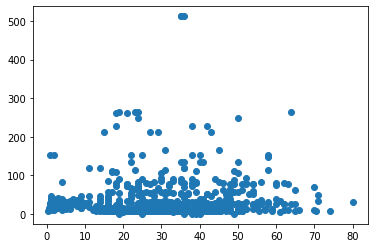

In [309]:
plt.scatter(x["Age"],x["Fare"])

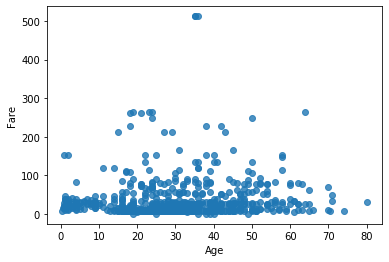

In [310]:
sns.regplot(x["Age"],x["Fare"],fit_reg=False)

# One Continous and One Discrete

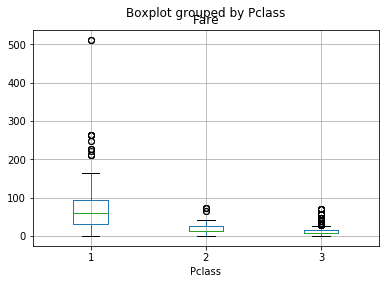

In [311]:
a=x.boxplot(column="Fare",by="Pclass")

# Two Categorical Variables

In [312]:
n=pd.crosstab(x["Survived"],x["Sex"])

In [313]:
n

Sex,female,male
Survived,,
0,81,468
1,233,109


<BarContainer object of 2 artists>

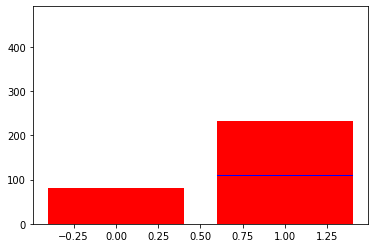

In [335]:
plt.bar(n.index,n["female"],color="red")
plt.bar(n.index,bottom=n["male"],color="blue",height=0.7)


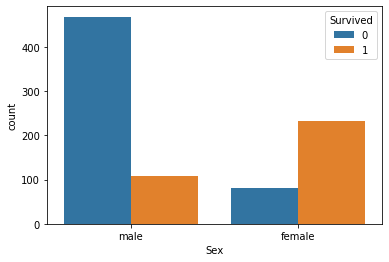

In [336]:
sns.countplot(x="Sex",hue="Survived",data=x)

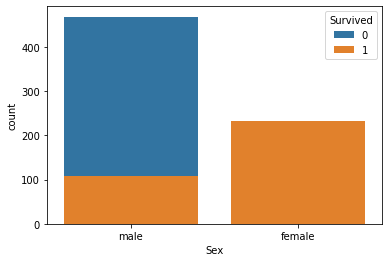

In [337]:
sns.countplot(x="Sex",hue="Survived",data=x,dodge=False)

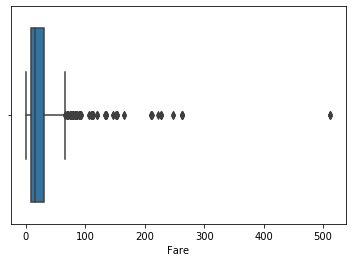

In [56]:
sns.boxplot(x["Fare"])

In [57]:
from scipy.stats import iqr

In [60]:
lower=x["Fare"].quantile(0.25)-(1.5*iqr(x["Fare"]))

In [61]:
lower

-26.724

In [62]:
upper=x["Fare"].quantile(0.75)+(1.5*iqr(x["Fare"]))

In [63]:
upper

65.6344

In [64]:
x["Fare"].clip(lower,upper,inplace=True)

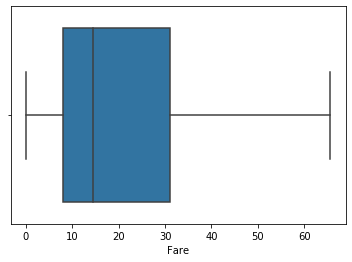

In [65]:
sns.boxplot(x["Fare"])